
# Confusion matrix


Example of confusion matrix usage to evaluate the quality
of the output of a classifier on the iris data set. The
diagonal elements represent the number of points for which
the predicted label is equal to the true label, while
off-diagonal elements are those that are mislabeled by the
classifier. The higher the diagonal values of the confusion
matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without
normalization by class support size (number of elements
in each class). This kind of normalization can be
interesting in case of class imbalance to have a more
visual interpretation of which class is being misclassified.

In [1]:
# make sure the graphics is displayed properly in-lined.

In [2]:
%matplotlib inline

## Let's run the script straight off.

In [3]:
# Import the usual suspects
import numpy as np
import matplotlib.pyplot as plt

# Import Support Vector Machine and data, various tools
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Import the Iris data set and separate data and labels; as per usual. Get the target_names (['Setosa',...])
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Actually run the SVM on the data.
Note the extreme compactness of this code(!)

In [4]:
# Use a model that is too regularized (C too low, C=0.01) to see the impact on the results
classifier = svm.SVC(kernel='linear', C=0.005)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

## Define a function for plotting confusion matrix, normalized and non-normalized.

In [5]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


## Readily plot the confuson maxtrix for the Iris data set. 

Confusion matrix, without normalization
[[13  0  0]
 [ 1  0 15]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.06 0.   0.94]
 [0.   0.   1.  ]]


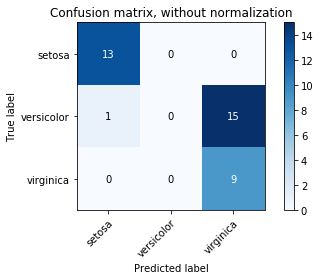

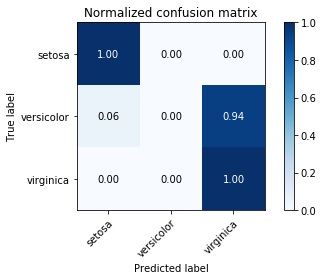

In [6]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Exercise: play a bit with the parameter(s)
You have one hyperparameter if you do linear SVM with hinge loss (the $C$ param), you get two hyperparameters if you go over the top and implement a non-linear RBF based SVM (the $C$ and the $\gamma$ params). 

In real life applications optimal hyperparameters are usually chosen using a `grid_search`.

### Btw: what is the absolut best result we can get?

# Exercise: make a grid search
#### Vary parameters and find best model hyperparameter(s).
If you choose to go with the linear SVM, you have only one hyperparameter, $C$. If you choose something fancier, like the RBF kernel, you have two -- remember? ($C$ and $\gamma$).